# Step 1: Prepare Data

In [46]:
import pandas as pd
import os
from collections import defaultdict

CATEGORIES = [
    'Exact match',
    'Partial match - Extra items',
    'Partial match - Missing items',
    'Partial match - Mixed',
    'Mismatch'
]

COLORS = {
    'Exact match': '#4eaf4a',   # green
    'Partial match - Extra items': '#377eb8',  # blue
    'Partial match - Missing items': '#ff7f00', # orange
    'Partial match - Mixed': '#984ea4',  # purple
    'Mismatch': '#e41a1b'   # red
}

def load_model_results(directory_with_csvs):
    all_models = {}

    for filename in os.listdir(directory_with_csvs):
        if filename.endswith('.csv'):
            model_name = os.path.splitext(filename)[0].split('_')[-1]
            filepath = os.path.join(directory_with_csvs, filename)
            df = pd.read_csv(filepath)
            category_counts = defaultdict(int)

            for _, row in df.iterrows():
                expected_assets = row['Expected Assets'] if pd.notna(row['Expected Assets']) else ''
                returned_assets = row['Returned Assets'] if pd.notna(row['Returned Assets']) else ''
                
                expected_set = set(map(str.strip, expected_assets.split(','))) if expected_assets else set()
                returned_set = set(map(str.strip, returned_assets.split(','))) if returned_assets else set()
                
                matched = row['Matched'] if 'Matched' in row else False

                if matched:
                    category = 'Exact match'
                elif expected_set == returned_set:
                    category = 'Exact match'
                elif expected_set.issubset(returned_set) and returned_set:
                    category = 'Partial match - Extra items'
                elif returned_set.issubset(expected_set) and returned_set:
                    category = 'Partial match - Missing items'
                elif expected_set & returned_set:
                    category = 'Partial match - Mixed'
                else:
                    category = 'Mismatch'

                category_counts[category] += 1

            total = sum(category_counts.values())
            for key in category_counts:
                category_counts[key] = (category_counts[key] / total) * 100

            all_models[model_name] = category_counts

    return all_models


In [47]:
all_models = load_model_results('output/models')

# Define model prices - April 2025
model_prices = {
    'gpt-4.1-nano': 0.50,
    'gpt-4o-mini': 0.75,
    'gpt-4.1-mini': 2.00,
    'o3-mini': 5.50,
    'o1-mini': 5.50,
    'gpt-4o': 12.50,
    'o1': 75.00,
    'gpt-4.5': 225.00
}

# Sort model names by price
model_names = list(all_models.keys())
model_names = sorted(model_names, key=lambda m: model_prices.get(m, float('inf')))

data = {cat: [all_models[model].get(cat, 0) for model in model_names] for cat in CATEGORIES}

# Step 2: Visualize results of models evaluation
Build stacked bar chart to compare model performance

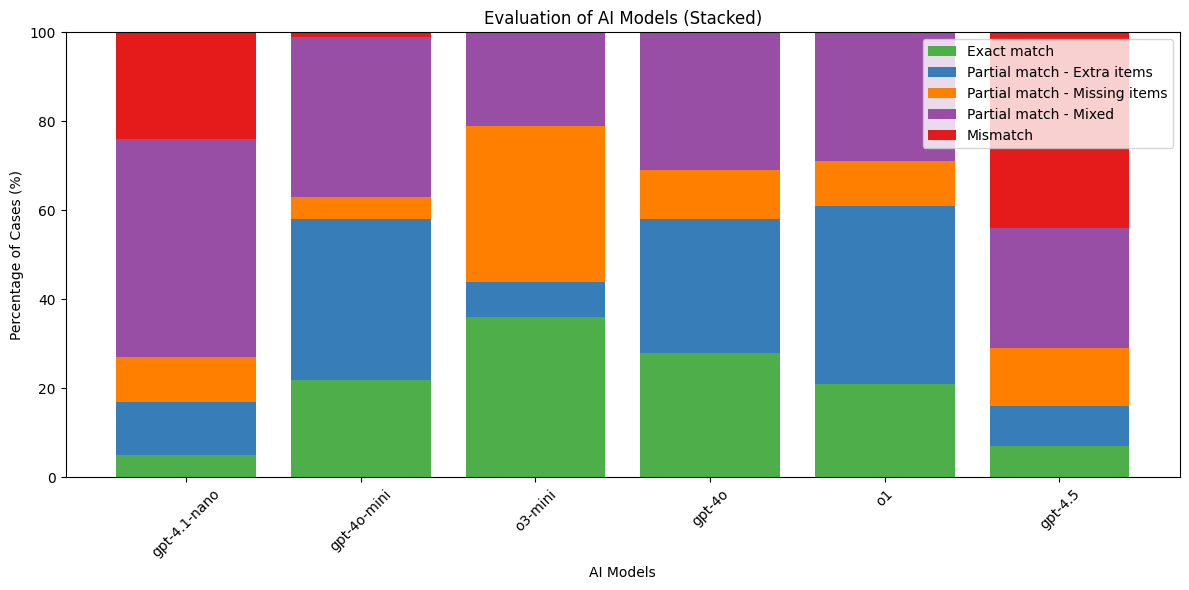

In [48]:
import matplotlib.pyplot as plt

x = range(len(model_names))

fig, ax = plt.subplots(figsize=(12, 6))

bottom = [0] * len(model_names)

for cat in CATEGORIES:
    ax.bar(x, data[cat], bottom=bottom, label=cat, color=COLORS.get(cat, 'gray'))
    bottom = [i + j for i, j in zip(bottom, data[cat])]

ax.set_xlabel('AI Models')
ax.set_ylabel('Percentage of Cases (%)')
ax.set_title('Evaluation of AI Models (Stacked)')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

# Step 3: Visualize results of prompt engineering evaluation

In [53]:
all_models = load_model_results('output/prompt_engineering')

# Sort by success rate (percentage of Exact match, descending)
model_names = list(all_models.keys())
model_names = sorted(
    model_names, 
    key=lambda m: all_models[m].get('Exact match', 0)
)

# Prepare data for plotting
data = {cat: [all_models[model].get(cat, 0) for model in model_names] for cat in CATEGORIES}

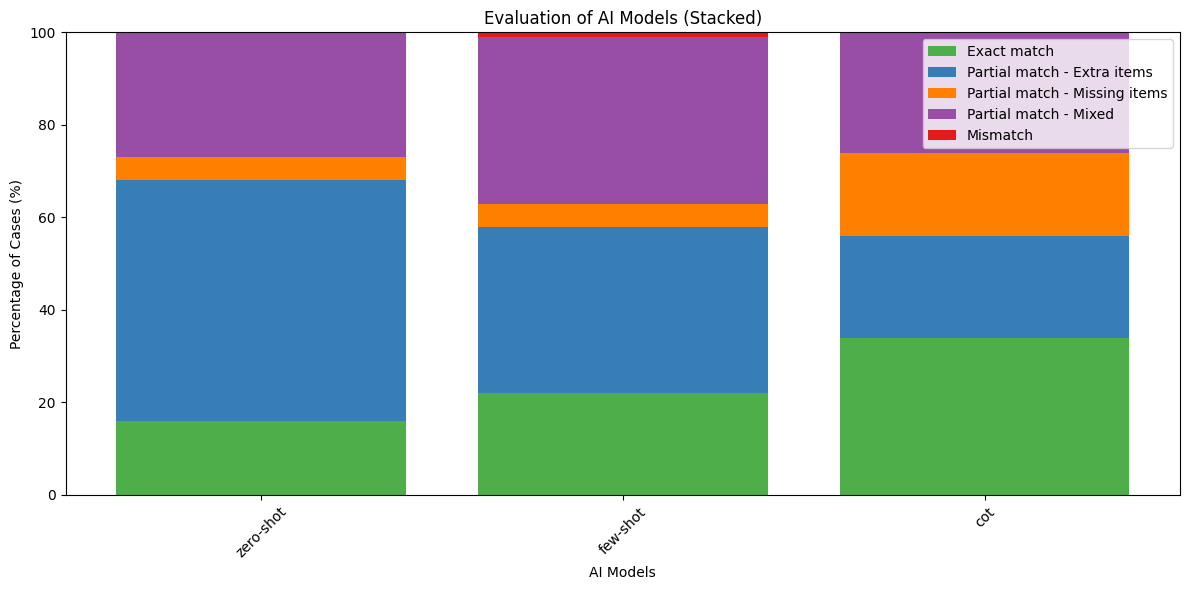

In [54]:
import matplotlib.pyplot as plt

x = range(len(model_names))

fig, ax = plt.subplots(figsize=(12, 6))

bottom = [0] * len(model_names)

for cat in CATEGORIES:
    ax.bar(x, data[cat], bottom=bottom, label=cat, color=COLORS.get(cat, 'gray'))
    bottom = [i + j for i, j in zip(bottom, data[cat])]

ax.set_xlabel('AI Models')
ax.set_ylabel('Percentage of Cases (%)')
ax.set_title('Evaluation of AI Models (Stacked)')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()